<a href="https://colab.research.google.com/github/nandinivashishtha1/Laptop-Price-Predictor/blob/main/LAPTOP_PRICE_PREDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('laptops.csv',encoding="latin-1")

In [ ]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


In [ ]:
df.duplicated().sum()

28

In [ ]:
df['Operating System Version'].value_counts()

10      1072
7         45
X          8
10 S       8
Name: Operating System Version, dtype: int64

In [ ]:
df.drop(columns=['Operating System Version'],inplace=True)

In [ ]:
df.isnull().sum()

Manufacturer        0
Model Name          0
Category            0
Screen Size         0
Screen              0
CPU                 0
RAM                 0
 Storage            0
GPU                 0
Operating System    0
Weight              0
Price (Euros)       0
dtype: int64

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Manufacturer        0
Model Name          0
Category            0
Screen Size         0
Screen              0
CPU                 0
RAM                 0
 Storage            0
GPU                 0
Operating System    0
Weight              0
Price (Euros)       0
dtype: int64

In [ ]:
df['RAM']=df['RAM'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [ ]:
df.sample(2)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Euros)
1049,Asus,Chromebook C202SA,Netbook,"11.6""",1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.2,"287,90"
295,Lenovo,Legion Y720-15IKB,Gaming,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows,3.2,"1299,00"


In [ ]:
df['RAM']=df['RAM'].astype('int32')
#df['Weight']=df['Weight'].astype('float32')

In [ ]:
df['Weight'].value_counts()

2.2     117
2.1      58
2.4      42
2.5      38
2.3      37
       ... 
1.14      1
3.8       1
1.19      1
1.55      1
4.0       1
Name: Weight, Length: 179, dtype: int64

In [ ]:
df['Weight']=df['Weight'].fillna('').str.replace('s','').astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1275 non-null   object 
 1   Model Name        1275 non-null   object 
 2   Category          1275 non-null   object 
 3   Screen Size       1275 non-null   object 
 4   Screen            1275 non-null   object 
 5   CPU               1275 non-null   object 
 6   RAM               1275 non-null   int32  
 7    Storage          1275 non-null   object 
 8   GPU               1275 non-null   object 
 9   Operating System  1275 non-null   object 
 10  Weight            1275 non-null   float32
 11  Price (Euros)     1275 non-null   object 
dtypes: float32(1), int32(1), object(10)
memory usage: 119.5+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1275 non-null   object 
 1   Model Name        1275 non-null   object 
 2   Category          1275 non-null   object 
 3   Screen Size       1275 non-null   object 
 4   Screen            1275 non-null   object 
 5   CPU               1275 non-null   object 
 6   RAM               1275 non-null   int32  
 7    Storage          1275 non-null   object 
 8   GPU               1275 non-null   object 
 9   Operating System  1275 non-null   object 
 10  Weight            1275 non-null   float32
 11  Price (Euros)     1275 non-null   object 
dtypes: float32(1), int32(1), object(10)
memory usage: 119.5+ KB


In [ ]:
import seaborn as sns

In [ ]:
df['Price (Euros)']=df['Price (Euros)'].str.replace(',','.')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


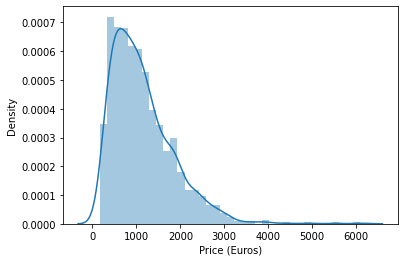

In [ ]:
sns.distplot(df['Price (Euros)'])

In [ ]:
df['Price (Euros)'].sample(2)

102     647.00
826    1358.00
Name: Price (Euros), dtype: object

In [ ]:
df['Price (Euros)']=df['Price (Euros)'].astype('float32')

In [ ]:
df['Price (Euros)']=df['Price (Euros)']*(87.68)

In [ ]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,117464.015625
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,78819.062500
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,50416.000000
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,222483.609375
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,158139.640625


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


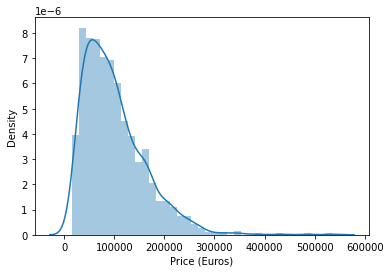

In [ ]:
sns.distplot(df['Price (Euros)'])

In [ ]:
df['Price (Rupees)']=df['Price (Euros)']

In [ ]:
df.drop(columns=('Price (Euros)'),inplace=True)

In [ ]:
df['Price (Rupees)']=df['Price (Rupees)'].astype('float64')

In [ ]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Rupees)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,117464.015625
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,78819.062500
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,50416.000000
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,222483.609375
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,158139.640625


In [ ]:
df['Screen Size']=df['Screen Size'].str.replace('"','')

In [ ]:
df.sample(2)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Rupees)
714,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,16,512GB SSD,Intel HD Graphics 620,Windows,1.93,125089.554688
1094,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows,2.40,140200.328125


In [ ]:
df['Screen Size']=df['Screen Size'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1275 non-null   object 
 1   Model Name        1275 non-null   object 
 2   Category          1275 non-null   object 
 3   Screen Size       1275 non-null   float64
 4   Screen            1275 non-null   object 
 5   CPU               1275 non-null   object 
 6   RAM               1275 non-null   int32  
 7    Storage          1275 non-null   object 
 8   GPU               1275 non-null   object 
 9   Operating System  1275 non-null   object 
 10  Weight            1275 non-null   float32
 11  Price (Rupees)    1275 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 119.5+ KB


In [ ]:
df.drop(columns=('Model Name'),inplace=True)

In [ ]:
df.head()

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Rupees)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,117464.015625
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,78819.062500
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,50416.000000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,222483.609375
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,158139.640625


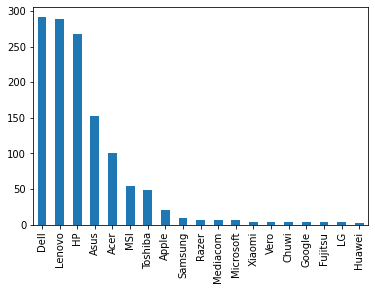

In [ ]:
df['Manufacturer'].value_counts().plot(kind='bar')

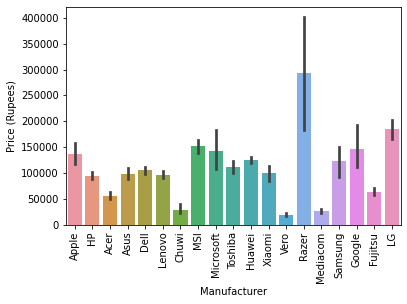

In [ ]:
sns.barplot(x=df['Manufacturer'],y=df['Price (Rupees)'])
plt.xticks(rotation='vertical')
plt.show()

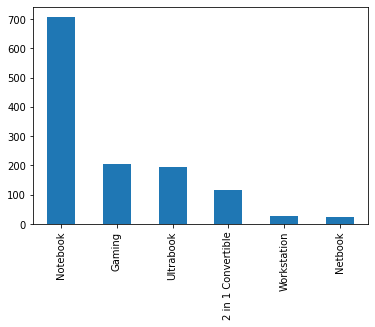

In [ ]:
df['Category'].value_counts().plot(kind='bar')

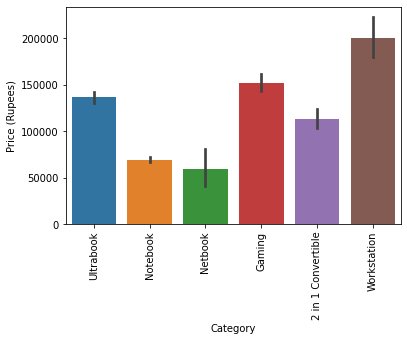

In [ ]:
sns.barplot(x=df['Category'],y=df['Price (Rupees)'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Screen'].value_counts()

Full HD 1920x1080                                505
1366x768                                         263
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

In [ ]:
df['Touchscreen']=df['Screen'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [ ]:
df.sample(2)

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Rupees),Touchscreen
163,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows,2.5,94606.718750,0
943,Toshiba,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows,2.2,98113.921875,0


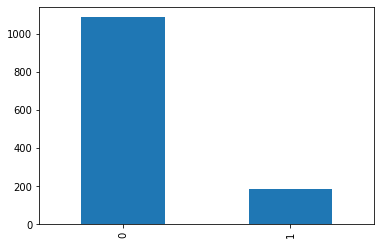

In [ ]:
df['Touchscreen'].value_counts().plot(kind='bar')

In [ ]:
df['IPS']=df['Screen'].apply(lambda x:1 if 'IPS' in x else 0)

In [ ]:
df.head()

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Rupees),Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,117464.015625,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,78819.062500,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,50416.000000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,222483.609375,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,158139.640625,0,1


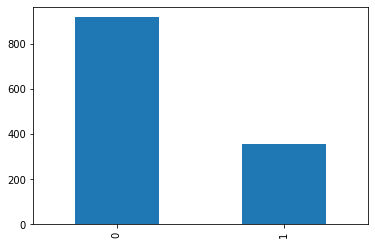

In [ ]:
df['IPS'].value_counts().plot(kind='bar')

In [ ]:
new=df['Screen'].str.split('x',n=1,expand=True)

In [ ]:
df['X_res']=new[0]
df['Y_res']=new[1]


In [ ]:
df.sample(2)

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Rupees),Touchscreen,IPS,X_res,Y_res
582,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows,1.49,63041.921875,0,0,Full HD 1920,1080
15,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,256GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,133146.468750,0,1,IPS Panel Retina Display 2560,1600


In [ ]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'\d+\.?\d+').apply(lambda x:x[0])

In [ ]:
df.head()

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Rupees),Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,117464.015625,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,78819.062500,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,50416.000000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,222483.609375,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,158139.640625,0,1,2560,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1275 non-null   object 
 1   Category          1275 non-null   object 
 2   Screen Size       1275 non-null   float64
 3   Screen            1275 non-null   object 
 4   CPU               1275 non-null   object 
 5   RAM               1275 non-null   int32  
 6    Storage          1275 non-null   object 
 7   GPU               1275 non-null   object 
 8   Operating System  1275 non-null   object 
 9   Weight            1275 non-null   float32
 10  Price (Rupees)    1275 non-null   float64
 11  Touchscreen       1275 non-null   int64  
 12  IPS               1275 non-null   int64  
 13  X_res             1275 non-null   object 
 14  Y_res             1275 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 181.7+ KB


In [ ]:
df['X_res']=df['X_res'].astype('int32')
df['Y_res']=df['Y_res'].astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1275 non-null   object 
 1   Category          1275 non-null   object 
 2   Screen Size       1275 non-null   float64
 3   Screen            1275 non-null   object 
 4   CPU               1275 non-null   object 
 5   RAM               1275 non-null   int32  
 6    Storage          1275 non-null   object 
 7   GPU               1275 non-null   object 
 8   Operating System  1275 non-null   object 
 9   Weight            1275 non-null   float32
 10  Price (Rupees)    1275 non-null   float64
 11  Touchscreen       1275 non-null   int64  
 12  IPS               1275 non-null   int64  
 13  X_res             1275 non-null   int32  
 14  Y_res             1275 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 171.7+ KB


In [ ]:
df.corr()['Price (Rupees)']

Screen Size       0.066608
RAM               0.740287
Weight            0.211883
Price (Rupees)    1.000000
Touchscreen       0.188886
IPS               0.250737
X_res             0.552491
Y_res             0.548529
Name: Price (Rupees), dtype: float64

In [ ]:
df['ppi']=((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Screen Size']

In [ ]:
df['ppi'].head()

0    226.983005
1    127.677940
2    141.211998
3    220.534624
4    226.983005
Name: ppi, dtype: float64

In [ ]:
df['ppi']=df['ppi'].astype('float')

In [ ]:
df.corr()['Price (Rupees)']

Screen Size       0.066608
RAM               0.740287
Weight            0.211883
Price (Rupees)    1.000000
Touchscreen       0.188886
IPS               0.250737
X_res             0.552491
Y_res             0.548529
ppi               0.470032
Name: Price (Rupees), dtype: float64

In [ ]:
df.sample()

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Rupees),Touchscreen,IPS,X_res,Y_res,ppi
48,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,AMD Radeon R5 M430,Windows,2.3,56027.519531,0,0,1920,1080,141.211998


In [ ]:
df.drop(columns=['Screen','Screen Size','X_res','Y_res'],inplace=True)

In [ ]:
df.head()

,Manufacturer,Category,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Rupees),Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,117464.015625,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,78819.062500,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,50416.000000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,222483.609375,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,158139.640625,0,1,226.983005


In [ ]:
df['CPU'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: CPU, Length: 118, dtype: int64

In [ ]:
df['CPU Name']=df['CPU'].apply(lambda x:" ".join(x.split()[0:3]))

In [ ]:
df.sample(2)

,Manufacturer,Category,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Rupees),Touchscreen,IPS,ppi,CPU Name
891,HP,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,16,256GB SSD,Intel HD Graphics 620,Windows,1.42,122664.320312,1,0,276.053530,Intel Core i7
1217,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,No OS,2.80,47259.519531,0,0,106.113062,Intel Core i5


In [ ]:
def fetch_processor(text):
  if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
    return text
  else:
    if text.split()[0]=='Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor' 

In [ ]:
df['CPU Brand']=df['CPU Name'].apply(fetch_processor)

In [ ]:
df.head()

,Manufacturer,Category,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Rupees),Touchscreen,IPS,ppi,CPU Name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,117464.015625,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,78819.062500,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,50416.000000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,222483.609375,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,158139.640625,0,1,226.983005,Intel Core i5,Intel Core i5


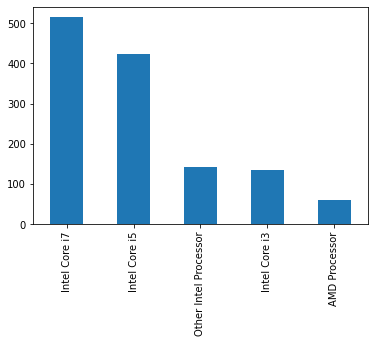

In [ ]:
df['CPU Brand'].value_counts().plot(kind='bar')

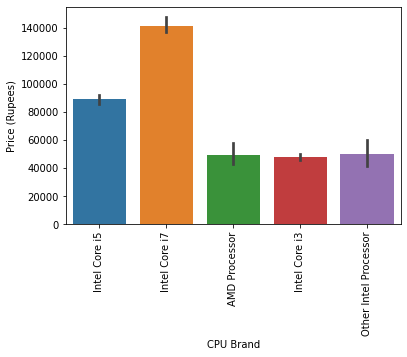

In [ ]:
sns.barplot(x=df['CPU Brand'],y=df['Price (Rupees)'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(columns=['CPU','CPU Name'],inplace=True)

In [ ]:
df.head()

,Manufacturer,Category,RAM,Storage,GPU,Operating System,Weight,Price (Rupees),Touchscreen,IPS,ppi,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,117464.015625,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,78819.062500,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,50416.000000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,222483.609375,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,158139.640625,0,1,226.983005,Intel Core i5


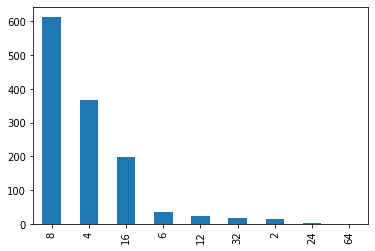

In [ ]:
df['RAM'].value_counts().plot(kind='bar')

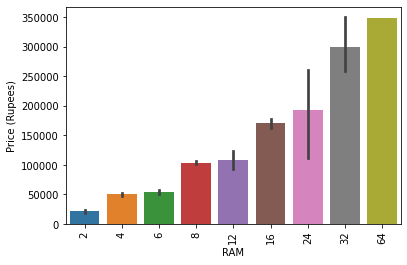

In [ ]:
sns.barplot(x=df['RAM'],y=df['Price (Rupees)'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df[' Storage'].value_counts()

256GB SSD                        412
1TB HDD                          216
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1TB Hybrid                         7
32GB SSD                           6
1GB SSD                            5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
df[' Storage']=df[' Storage'].astype(str).replace('\.0','',regex=True)
df[' Storage']=df[' Storage'].str.replace('GB','')
df[' Storage']=df[' Storage'].str.replace('TB','000')
new=df[' Storage'].str.split("+",n=1,expand=True)

df['first']=new[0]
df['first']=df['first'].str.strip()

df['second']=new[1]

df['layer1hdd']=df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['layer1ssd']=df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['layer1hybrid']=df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['layer1flashstorage']=df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df['first']=df['first'].str.replace(r'\D','')

df['second'].fillna('0',inplace=True)

df['layer2hdd']=df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['layer2ssd']=df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['layer2hybrid']=df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['layer2flashstorage']=df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df['second']=df['second'].str.replace(r'\D','')

df['first']=df['first'].astype(int)
df['second']=df['second'].astype(int)

df['HDD']=(df['first']*df['layer1hdd']+df['second']*df['layer2hdd'])
df['SSD']=(df['first']*df['layer1ssd']+df['second']*df['layer2ssd'])
df['Hybrid']=(df['first']*df['layer1hybrid']+df['second']*df['layer2hybrid'])
df['Flash_Storage']=(df['first']*df['layer1flashstorage']+df['second']*df['layer2flashstorage'])

df.drop(columns=['first','second','layer1hdd','layer1ssd','layer1hybrid','layer1flashstorage','layer2hdd','layer2ssd','layer2hybrid','layer2flashstorage'],inplace=True)





<ipython-input-79-19b85b6037d0>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first']=df['first'].str.replace(r'\D','')
<ipython-input-79-19b85b6037d0>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second']=df['second'].str.replace(r'\D','')


In [ ]:
df.sample(10)

,Manufacturer,Category,RAM,Storage,GPU,Operating System,Weight,Price (Rupees),Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
374,Dell,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows,1.62,76194.796875,1,0,165.632118,Intel Core i7,0,256,0,0
436,HP,Notebook,4,500 HDD,Intel HD Graphics 400,Windows,2.10,30424.960938,0,0,100.454670,Other Intel Processor,500,0,0,0
558,HP,Notebook,6,128 SSD,AMD Radeon 530,Windows,1.91,49881.156250,0,1,141.211998,AMD Processor,0,128,0,0
156,Lenovo,2 in 1 Convertible,4,256 SSD,Intel HD Graphics 620,Windows,1.74,55150.718750,1,1,157.350512,Intel Core i3,0,256,0,0
116,HP,Notebook,8,512 SSD,Intel UHD Graphics 620,Windows,1.63,95045.117188,0,0,157.350512,Intel Core i7,0,512,0,0
839,Asus,Notebook,8,128 HDD,Intel HD Graphics 620,Windows,2.30,51731.199219,0,0,141.211998,Intel Core i5,128,0,0,0
1037,Toshiba,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows,1.47,151248.000000,0,1,157.350512,Intel Core i7,0,256,0,0
31,Asus,Notebook,2,32 Flash Storage,AMD Radeon R2,Windows,1.65,17448.320312,0,0,111.935204,AMD Processor,0,0,0,32
1074,Lenovo,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows,1.30,150238.796875,1,1,176.232574,Intel Core i7,0,256,0,0
84,Acer,Notebook,4,1000 HDD,AMD Radeon R5,Windows,2.10,34633.601562,0,0,100.454670,AMD Processor,1000,0,0,0


In [ ]:
df['Hybrid'].value_counts()

0       1265
1000       9
508        1
Name: Hybrid, dtype: int64

In [ ]:
df.drop(columns=[' Storage'],inplace=True)

In [ ]:
df.head()

,Manufacturer,Category,RAM,GPU,Operating System,Weight,Price (Rupees),Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,117464.015625,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,78819.062500,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,50416.000000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,222483.609375,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,158139.640625,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
df.corr()['Price (Rupees)']

RAM               0.740287
Weight            0.211883
Price (Rupees)    1.000000
Touchscreen       0.188886
IPS               0.250737
ppi               0.470032
HDD              -0.098108
SSD               0.669149
Hybrid            0.022598
Flash_Storage    -0.037031
Name: Price (Rupees), dtype: float64

In [ ]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [ ]:
df.head()

,Manufacturer,Category,RAM,GPU,Operating System,Weight,Price (Rupees),Touchscreen,IPS,ppi,CPU Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,117464.015625,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,78819.062500,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,50416.000000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,222483.609375,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,158139.640625,0,1,226.983005,Intel Core i5,0,256


In [ ]:
df['GPU'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: GPU, Length: 110, dtype: int64

In [ ]:
df['GPU Brand']=df['GPU'].apply(lambda x:x.split()[0])

In [ ]:
df.head()

,Manufacturer,Category,RAM,GPU,Operating System,Weight,Price (Rupees),Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,117464.015625,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,78819.062500,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,50416.000000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,222483.609375,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,158139.640625,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
df['GPU Brand'].value_counts()

Intel     704
Nvidia    396
AMD       174
ARM         1
Name: GPU Brand, dtype: int64

In [ ]:
df=df[df['GPU Brand']!='ARM']

In [ ]:
df.sample()

,Manufacturer,Category,RAM,GPU,Operating System,Weight,Price (Rupees),Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand
358,Dell,Notebook,8,Intel HD Graphics 620,Windows,2.36,48870.203125,1,0,100.45467,Intel Core i5,2000,0,Intel


In [ ]:
df['GPU Brand'].value_counts()

Intel     704
Nvidia    396
AMD       174
Name: GPU Brand, dtype: int64

In [ ]:
df.drop(columns=['GPU'],inplace=True)

In [ ]:
df.sample()

,Manufacturer,Category,RAM,Operating System,Weight,Price (Rupees),Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand
52,HP,Notebook,4,Windows,1.86,34939.601562,0,0,141.211998,AMD Processor,0,256,AMD


In [ ]:
df.head()

,Manufacturer,Category,RAM,Operating System,Weight,Price (Rupees),Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,117464.015625,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,78819.062500,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,50416.000000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,222483.609375,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,158139.640625,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
df['Operating System'].value_counts()


Windows      1101
No OS          66
Linux          58
Chrome OS      26
macOS          13
Mac OS          8
Android         2
Name: Operating System, dtype: int64

In [ ]:
def cat_os(inp):
  if inp=='Windows':
    return inp
  elif inp=='macOS' or inp=='Mac OS':
    return 'Mac'
  else:
    return 'Others/No OS/Linux'

In [ ]:
df['OS']=df['Operating System'].apply(cat_os)

In [ ]:
df.head()


,Manufacturer,Category,RAM,Operating System,Weight,Price (Rupees),Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,117464.015625,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,78819.062500,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,50416.000000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,222483.609375,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,158139.640625,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
df.drop(columns=['Operating System'],inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


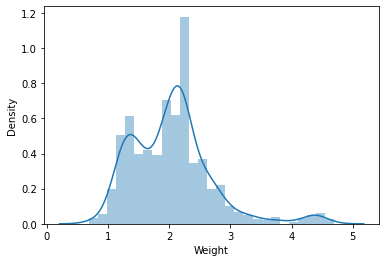

In [ ]:
sns.distplot(df['Weight'])

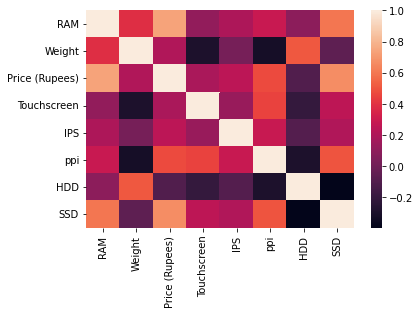

In [ ]:
sns.heatmap(df.corr())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


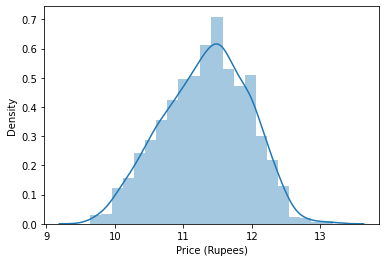

In [ ]:
sns.distplot(np.log(df['Price (Rupees)']))

In [ ]:
X=df.drop(columns=['Price (Rupees)'])
Y=np.log(df['Price (Rupees)'])

In [ ]:
X.head()

,Manufacturer,Category,RAM,Weight,Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
Y

0       11.673887
1       11.274910
2       10.828064
3       12.312609
4       11.971234
          ...    
1270    10.932032
1271    11.786247
1272     9.907416
1273    11.112262
1274    10.384490
Name: Price (Rupees), Length: 1274, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=2)

In [ ]:
X_train

,Manufacturer,Category,RAM,Weight,Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,OS
21,Lenovo,Gaming,8,2.50,0,1,141.211998,Intel Core i5,1000,128,Nvidia,Windows
790,Asus,Gaming,8,2.24,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
273,Lenovo,2 in 1 Convertible,16,1.36,1,0,209.800683,Intel Core i7,0,512,Intel,Windows
397,Lenovo,Notebook,8,1.90,0,1,157.350512,Intel Core i5,0,256,Intel,Windows
921,HP,Ultrabook,8,1.84,0,0,141.211998,Intel Core i7,0,256,AMD,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor

In [ ]:
step1=ColumnTransformer(transformers=[
('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15)

pipe=Pipeline([
('step1',step1),
('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred=pipe.predict(X_test)


print('R2 Score',r2_score(y_test,Y_pred))
print('MAE',mean_absolute_error(y_test,Y_pred))

R2 Score 0.8768710575431516
MAE 0.16416680647585502


In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))


In [ ]:
df.head(1)

,Manufacturer,Category,RAM,Weight,Price (Rupees),Touchscreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,117464.015625,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


In [ ]:
df['HDD'].value_counts()

0       714
1000    400
500     126
2000     32
32        1
128       1
Name: HDD, dtype: int64

In [ ]:
df['SSD'].value_counts()

256     498
0       437
128     170
512     134
1000     16
32        6
1         5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: SSD, dtype: int64